In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('Sales Data.csv')
df.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


In [4]:
df.isna().sum()

,0
Unnamed: 0,0
Order ID,0
Product,0
Quantity Ordered,0
Price Each,0
Order Date,0
Purchase Address,0
Month,0
Sales,0
City,0


In [5]:
df.duplicated().sum()

0

In [6]:
df.columns

Index(['Unnamed: 0', 'Order ID', 'Product', 'Quantity Ordered', 'Price Each',
       'Order Date', 'Purchase Address', 'Month', 'Sales', 'City', 'Hour'],
      dtype='object')

In [7]:
print(df['Order ID'].dtype)

int64


In [9]:
df['Order ID'] = df['Order ID'].astype(str)
print(df['Order ID'].dtype)

object


In [10]:
print(df['Price Each'].dtype)

float64


In [14]:
df['Order Date'] = pd.to_datetime(df['Order Date'] , format='%m/%d/%Y')
print(df['Order Date'].dtype)

datetime64[ns]


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Unnamed: 0        185950 non-null  int64         
 1   Order ID          185950 non-null  object        
 2   Product           185950 non-null  object        
 3   Quantity Ordered  185950 non-null  int64         
 4   Price Each        185950 non-null  float64       
 5   Order Date        185950 non-null  datetime64[ns]
 6   Purchase Address  185950 non-null  object        
 7   Month             185950 non-null  int64         
 8   Sales             185950 non-null  float64       
 9   City              185950 non-null  object        
 10  Hour              185950 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(4)
memory usage: 15.6+ MB


In [16]:
df.describe()

,Unnamed: 0,Quantity Ordered,Price Each,Order Date,Month,Sales,Hour
count,185950.000000,185950.000000,185950.000000,185950,185950.000000,185950.000000,185950.000000
mean,8340.388475,1.124383,184.399735,2019-07-18 21:54:38.887550464,7.059140,185.490917,14.413305
min,0.000000,1.000000,2.990000,2019-01-01 03:07:00,1.000000,2.990000,0.000000
25%,3894.000000,1.000000,11.950000,2019-04-16 21:05:15,4.000000,11.950000,11.000000
50%,7786.000000,1.000000,14.950000,2019-07-17 20:40:30,7.000000,14.950000,15.000000
75%,11872.000000,1.000000,150.000000,2019-10-26 08:14:00,10.000000,150.000000,19.000000
max,25116.000000,9.000000,1700.000000,2020-01-01 05:13:00,12.000000,3400.000000,23.000000
std,5450.554093,0.442793,332.731330,NaN,3.502996,332.919771,5.423416


In [17]:
mean_quantity = df['Quantity Ordered'].mean()
print(mean_quantity)

1.1243828986286637


In [18]:
median_unit_price = df['Price Each'].median()
print(median_unit_price)

14.95


In [19]:
std_sales = df['Sales'].std()
print(std_sales)

332.9197713864238


In [20]:
min_date = df['Order Date'].min()
print(min_date)

2019-01-01 03:07:00


In [21]:
sum_sales = df['Sales'].sum()
print(sum_sales)

34492035.97


In [22]:
count_transactions = df['Order ID'].count()
print(count_transactions)

185950


In [23]:
avg_sales = sum_sales / count_transactions
print(avg_sales)

185.490916751815


In [25]:
df.columns

Index(['Unnamed: 0', 'Order ID', 'Product', 'Quantity Ordered', 'Price Each',
       'Order Date', 'Purchase Address', 'Month', 'Sales', 'City', 'Hour'],
      dtype='object')

In [31]:
#Sales Per Month
monthly_sales = df.groupby('Month')['Sales'].sum()
print("Sales by Month:")
print(monthly_sales)

Sales by Month:
Month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Sales, dtype: float64


In [32]:
#Sales By City
city_sales = df.groupby('City')['Sales'].sum()
print("Sales by City:")
print(city_sales)

Sales by City:
City
Atlanta          2795498.58
Austin           1819581.75
Boston           3661642.01
Dallas           2767975.40
Los Angeles      5452570.80
New York City    4664317.43
Portland         2320490.61
San Francisco    8262203.91
Seattle          2747755.48
Name: Sales, dtype: float64


In [34]:
#best selling products
best_selling_products = df.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False)
print("Best Selling Products:")
print(best_selling_products)


Best Selling Products:
Product
AAA Batteries (4-pack)        31017
AA Batteries (4-pack)         27635
USB-C Charging Cable          23975
Lightning Charging Cable      23217
Wired Headphones              20557
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
27in FHD Monitor               7550
iPhone                         6849
27in 4K Gaming Monitor         6244
34in Ultrawide Monitor         6199
Google Phone                   5532
Flatscreen TV                  4819
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
20in Monitor                   4129
Vareebadd Phone                2068
LG Washing Machine              666
LG Dryer                        646
Name: Quantity Ordered, dtype: int64


In [35]:
#Avg Order Value
num_order = df['Order ID'].nunique()
total_sales = df['Sales'].sum()
avg_order_value = total_sales / num_order
print("Average Order Value:")
print(avg_order_value)

Average Order Value:
193.30091836334392


In [39]:
#Peak Sales Hour
hourly_sales = df.groupby('Hour')['Sales'].sum()
peak_sales_hour = hourly_sales.idxmax()
peak_sales_amount = hourly_sales.max()
print("Peak Sales Hour:")
print(f"Hour: {peak_sales_hour} (Sales: ${peak_sales_amount:,.2f})")

Peak Sales Hour:
Hour: 19 (Sales: $2,412,938.54)


In [64]:
import pandas as pd
from itertools import combinations
from collections import Counter

# Load Data (Ensure 'Order Date' is correctly parsed)
df = pd.read_csv("Sales Data.csv", parse_dates=['Order Date'])

# Create a copy to avoid modifying the original dataframe
df1 = df[['Order ID', 'Product']].copy()

# Keep only rows where 'Order ID' appears more than once
df1 = df1[df1['Order ID'].duplicated(keep=False)]

# Create a grouped column that combines products by Order ID
df1['Grouped'] = df1.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

# Drop duplicate Order IDs to keep only unique groups
df_grouped = df1[['Order ID', 'Grouped']].drop_duplicates()

# Count pair combinations
count = Counter()
for row in df_grouped['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

# Print the top 10 most common product pairs
print("Top 10 frequently sold product pairs:")
for key, value in count.most_common(10):
    print(key, value)

# Verify that 'Order Date' is still intact
print("\nColumns in the original DataFrame:")
print(df.columns)


Top 10 frequently sold product pairs:
('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92

Columns in the original DataFrame:
Index(['Unnamed: 0', 'Order ID', 'Product', 'Quantity Ordered', 'Price Each',
       'Order Date', 'Purchase Address', 'Month', 'Sales', 'City', 'Hour'],
      dtype='object')


In [65]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [66]:
df.columns

Index(['Unnamed: 0', 'Order ID', 'Product', 'Quantity Ordered', 'Price Each',
       'Order Date', 'Purchase Address', 'Month', 'Sales', 'City', 'Hour'],
      dtype='object')

In [67]:
if 'Order Date' in df.columns:
    print("Column exists")
else:
    print("Column missing")


Column exists


In [68]:
df = df.set_index('Order Date')

In [69]:
df = df.sort_index()

In [70]:
daily_sales = df['Sales'].resample('D').sum()

In [71]:
daily_sales.head()

,Sales
Order Date,
2019-01-01,65681.94
2019-01-02,70813.20
2019-01-03,47046.20
2019-01-04,62012.21
2019-01-05,46524.63


In [73]:
decomposition = seasonal_decompose(daily_sales,model='additive',period=30)

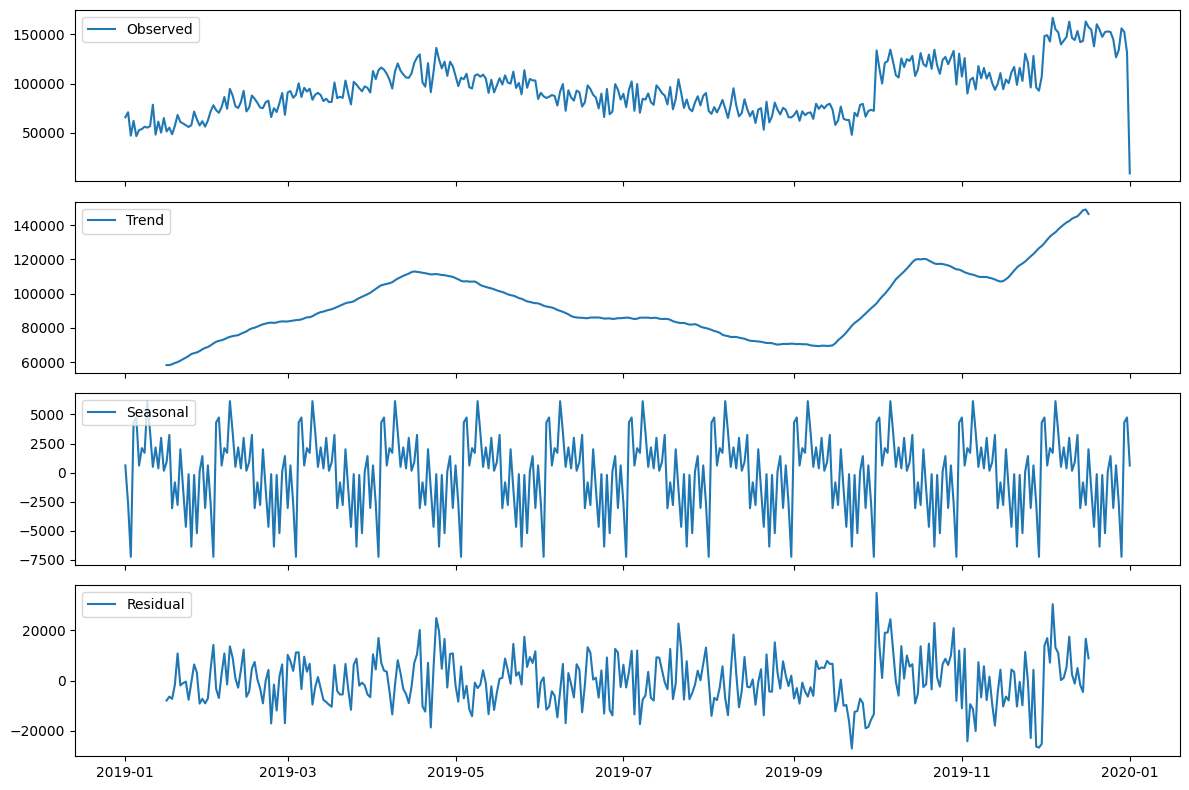

In [74]:
fig, axes = plt.subplots(4, 1, sharex=True, figsize=(12, 8))

axes[0].plot(decomposition.observed, label='Observed')
axes[0].legend(loc='upper left')

axes[1].plot(decomposition.trend, label='Trend')
axes[1].legend(loc='upper left')

axes[2].plot(decomposition.seasonal, label='Seasonal')
axes[2].legend(loc='upper left')

axes[3].plot(decomposition.resid, label='Residual')
axes[3].legend(loc='upper left')

plt.tight_layout()
plt.show()

Time Series Decomposition (Assuming you have data spanning multiple years)

Purpose: Time series decomposition helps you understand the underlying patterns in your sales data. Specifically, it breaks down your sales data into three main components:
Trend: The long-term direction of your sales (increasing, decreasing, or stable).

Seasonality: Recurring patterns that repeat over a fixed period (e.g., monthly spikes, quarterly dips).

Residual (or Noise): The random fluctuations that are not explained by the trend or seasonality.

Decomposing your data allows you to isolate these components, making it easier to identify the drivers of your sales performance and make better forecasts.


In [77]:
import pandas as pd
df = pd.read_csv('Sales Data.csv')
cohort_data = df.groupby('Order ID')['Order Date'].min().reset_index()
cohort_data.rename(columns={'Order Date': 'Cohort Date'}, inplace=True)


In [79]:
df = pd.merge(df, cohort_data, on='Order ID', how='left')

In [82]:
df['Cohort Date'] = pd.to_datetime(df['Cohort Date'], errors='coerce')
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

df['Cohort Month'] = df['Cohort Date'].dt.to_period('M')
df['Order Month'] = df['Order Date'].dt.to_period('M')

In [86]:
#Time since first purchase
def time_diff(df2):
  month_df2 = df2['Order Month'] - df2['Cohort Month']
  return month_df2.apply(lambda x: x.n)

df['Cohort Index'] = time_diff(df)

In [88]:
cohort_pivot = df.groupby(['Cohort Month', 'Cohort Index'])['Order ID'].nunique().reset_index()

In [89]:
cohort_table = cohort_pivot.pivot_table(index='Cohort Month', columns='Cohort Index', values='Order ID')

In [90]:
print(cohort_table)

Cohort Index        0
Cohort Month         
2019-01        9262.0
2019-02       11496.0
2019-03       14549.0
2019-04       17528.0
2019-05       15836.0
2019-06       12989.0
2019-07       13761.0
2019-08       11484.0
2019-09       11202.0
2019-10       19436.0
2019-11       16859.0
2019-12       24004.0
2020-01          31.0


In [91]:
# Calculate retention rate
cohort_size = cohort_table.iloc[:,0]
retention_matrix = cohort_table.divide(cohort_size, axis=0)
print(retention_matrix.round(3) * 100)

Cohort Index      0
Cohort Month       
2019-01       100.0
2019-02       100.0
2019-03       100.0
2019-04       100.0
2019-05       100.0
2019-06       100.0
2019-07       100.0
2019-08       100.0
2019-09       100.0
2019-10       100.0
2019-11       100.0
2019-12       100.0
2020-01       100.0


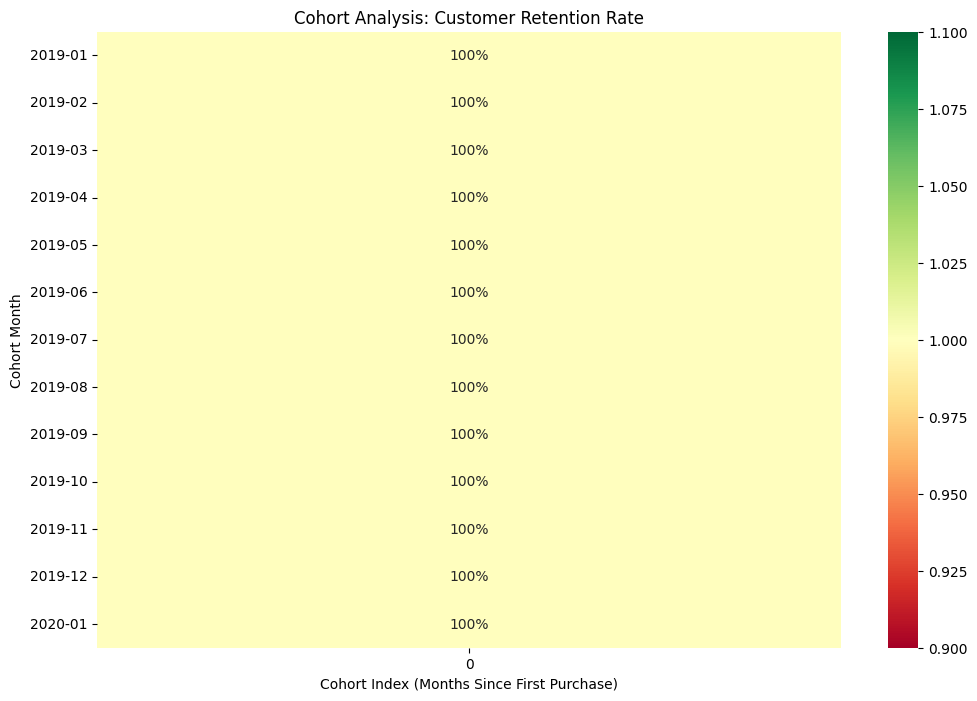

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize retention rate with a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(retention_matrix, annot=True, fmt=".0%", cmap="RdYlGn")
plt.title("Cohort Analysis: Customer Retention Rate")
plt.xlabel("Cohort Index (Months Since First Purchase)")
plt.ylabel("Cohort Month")
plt.show()